<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/Generalizing_over_a_cup_of_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GENERALIZATION:

## PROBLEM:
### The most annoying thing to happen ever is:

Imports

In [85]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.keras import TqdmCallback
from tqdm import trange
from sklearn.cluster import KMeans 
from sklearn import metrics

Creating a Mock Dataset:

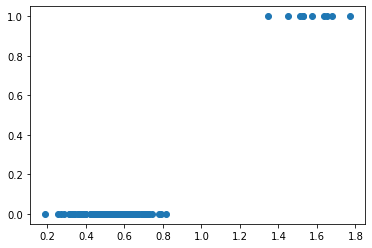

In [14]:
x = np.array([np.random.sample(5) for _ in range(100)] + [np.random.sample(5)+1 for _ in range(10)])
y = np.array([0 for _ in range(100)] + [1 for _ in range(10)])

x_image = np.array([np.mean(i) for i in x])

plt.scatter(x_image, y)
plt.show()

Creating A simple Binary Classifier

In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, epochs=200, verbose=0)
loss, acc = model.evaluate(x, y, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.9091


An Accuracy of 90% is Very Good but its useless because 90% of the Dataset was labelled as 0. People who are more experienced with Datascience already have an idea of what is wrong with having a Biased Dataset

In [30]:
x_0 = np.array([np.random.sample(5)])
pred_0 = model.predict(x_0)
print('Prediction for:',x_0, 'Predicted Label:',0 if pred_0[0][0]<0.5 else 1)

x_1 = np.array([np.random.sample(5)+1])
pred_1 = model.predict(x_1)
print('Prediction for:',x_1, 'Predicted Label:',0 if pred_1[0][0]<0.5 else 1)


Prediction for: [[0.59994939 0.43039392 0.14443391 0.20016838 0.96517142]] Predicted Label: 0
Prediction for: [[1.31351942 1.06967306 1.26164081 1.00613529 1.30995652]] Predicted Label: 0


Label 0 see the interesting thing here is, if I summed all the labels predicted by the model on the training set I will get a biased result where all the predictions are 0. As you can see below

In [32]:
y_pred = model.predict(x)
y_pred = y_pred.flatten()
y_pred = [0 if i<0.5 else 1 for i in y_pred]
print('Sum of All Predicted Labels:', sum(y_pred))

Sum of All Predicted Labels: 0


Why does this happen for Supervised Learning, especially Logistic Regression, let's try to even out the dataset:

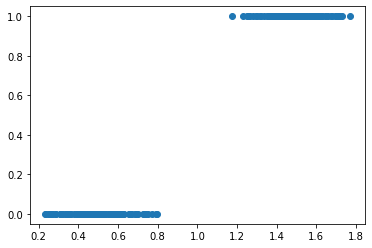

7/7 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9900
Prediction for: [[0.61511043 0.10005034 0.75728873 0.63586219 0.12573001]] Predicted Label: 0
Prediction for: [[1.35828825 1.73248822 1.98826871 1.52676735 1.40603689]] Predicted Label: 1
Sum of All Predicted Labels: 102


In [35]:
x = np.array([np.random.sample(5) for _ in range(100)] + [np.random.sample(5)+1 for _ in range(100)])
y = np.array([0 for _ in range(100)] + [1 for _ in range(100)])

x_image = np.array([np.mean(i) for i in x])

plt.scatter(x_image, y)
plt.show()

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, epochs=500, verbose=0)
loss, acc = model.evaluate(x, y, verbose=1)

x_0 = np.array([np.random.sample(5)])
pred_0 = model.predict(x_0)
print('Prediction for:',x_0, 'Predicted Label:',0 if pred_0[0][0]<0.5 else 1)

x_1 = np.array([np.random.sample(5)+1])
pred_1 = model.predict(x_1)
print('Prediction for:',x_1, 'Predicted Label:',0 if pred_1[0][0]<0.5 else 1)

y_pred = model.predict(x)
y_pred = y_pred.flatten()
y_pred = [0 if i<0.5 else 1 for i in y_pred]
print('Sum of All Predicted Labels:', sum(y_pred))

Let's see what happens when we try a weird x:

In [36]:
x_2 = np.array([np.random.sample(5)+2])
pred_2 = model.predict(x_2)
print('Prediction for:',x_2, 'Predicted Label:',0 if pred_2[0][0]<0.5 else 1)

Prediction for: [[2.773486   2.13129256 2.42357369 2.97922934 2.62683234]] Predicted Label: 1


In [37]:
x_m1 = np.array([np.random.sample(5)-1])
pred_m1 = model.predict(x_m1)
print('Prediction for:',x_m1, 'Predicted Label:',0 if pred_m1[0][0]<0.5 else 1)

Prediction for: [[-0.85905485 -0.073301   -0.61969783 -0.66044289 -0.70646453]] Predicted Label: 0


In [47]:
result_1_r_0 = 0
for _ in trange(10000):
  x_p100_m50 = np.array([np.random.sample(5)*100-50])
  pred_p100_m50 = model.predict(x_p100_m50)
  #print('Prediction for:',x_p100_m50, 'Predicted Label:',0 if pred_p100_m50[0][0]<0.5 else 1)
  result_1_r_0 += 0 if pred_p100_m50[0][0]<0.5 else 1
result_1_r_0 /= 100
print("\nRatio of 1 over 0 (1/0)", result_1_r_0) 

100%|██████████| 100/100 [00:02<00:00, 46.15it/s]


Ratio of 1 over 0 (1/0) 0.5


Well Perfect Results, this wasn't important I was just interested in the results.

## INTRODUCTION:

### Generalization:
In machine learning, generalization usually refers to the ability of an algorithm to be effective across a range of inputs and applications. So basically your model should neither OverFit nor UnderFit. The problem with this is that when we simply run the model with say the above outlook we will simply see an accuracy of 90% and then pogchamp but then later realise that it has poorly fit. 

So firstly take a look at your dataset. How it's description is, how many parameters your model has, cross-validation results, precision, recall, F1 Score, ROC Curve (Train and Validation), so many things can be and should be implemented. This article basically sits down to develop a pipeline which I can follow to realise whether I have made a model which is general or not. 

*Warning: I am new to ML, so please don't use/listen to everything I say blindly. Most of these things I either found or read and have no idea how many of them I may have read. Whatever places I can cite I will cite. Anyone wants to help please feel free to.

#### Question: Does Generalization exist for Unsupervised?

I think it does. It should ideally exist. I mean suppose you have checked your K-Means model on a dataset with P1 - Probability Distribution, it will not give the same results when implemented on a dataset with P2 - Probability Distribution, why? because now the Clustering Parameters have changed. Suppose the K-Means implementation uses 

Datasets for K-Means

In [57]:
dataset_1 = np.array([np.random.sample(1) for _ in range(5)] + [np.random.sample(1)*5 for _ in range(100)] + [np.random.sample(1)*10+5 for _ in range(10)] + [np.random.sample(1)*5+15 for _ in range(100)])
dataset_2 = np.array([np.random.sample(1) for _ in range(100)] + [np.random.sample(1)*5 for _ in range(5)] + [np.random.sample(1)*10+5 for _ in range(100)] + [np.random.sample(1)*5+15 for _ in range(10)])
dataset_3 = np.array([np.random.sample(1) for _ in range(4)] + [np.random.sample(1)*5 for _ in range(101)] + [np.random.sample(1)*10+5 for _ in range(11)] + [np.random.sample(1)*5+15 for _ in range(99)])

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(dataset_1)
output_1 = kmeans.labels_
output_2 = kmeans.predict(dataset_2)
output_3 = kmeans.predict(dataset_3)
print('output_1:',np.sum(output_1),'\n',output_1)
print()
print('output_2:',np.sum(output_2),'\n',output_2)
print()
print('output_3:',np.sum(output_3),'\n',output_3)

output_1: 111 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

output_2: 150 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]

output_3: 109 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

Therefore, changing the probability distribution definitely affects the effect of the model. The thing is Unsupervised Learning is the most susceptible to losing effectiveness as soon as probability distribution of incoming data changes. As you can see, datasets with similar distribution (dataset_1, dataset_3) give similar results, whereas a different distribution (dataset_2) gives weird results.



Now Let us return to describing Generalization for Supervised Learning:

There are multiple answers one gets when they search for generalization over Google. The top definition (top search) is at: 

and given as,

```
Generalization refers to how well the concepts learned by a machine learning
model apply to specific examples not seen by the model when it was learning.

The goal of a good machine learning model is to generalize well from the 
training data to any data from the problem domain. This allows us to make 
predictions in the future on data the model has never seen.
```

What I understand from this, basically Generalization is the ability of the model to give similar results for validation/testing/deploying on similar input data. The thing is concepts rather problems such as overfitting and underfitting hurt the model for these cases.

One of the simplest methods we can use to check whether something is overfitting while training is keep a validation set. That way we can see the model's loss/accuracy for the training as well testing case. Let us take the example: "Logistic Regression"

Dataset

In [66]:
x = np.array([np.random.sample(5) for _ in range(1000)] + [np.random.sample(5)+1 for _ in range(1000)])
y = np.array([0 for _ in range(1000)] + [1 for _ in range(1000)])
indexes = np.array(range(2000))
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

Clearing BackEnd and creating a EarlyStopping Callback

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5370 - val_loss: 0.6702 - val_accuracy: 0.5790
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.5940 - val_loss: 0.6442 - val_accuracy: 0.6160
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6150 - val_loss: 0.6236 - val_accuracy: 0.6390
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6267 - acc

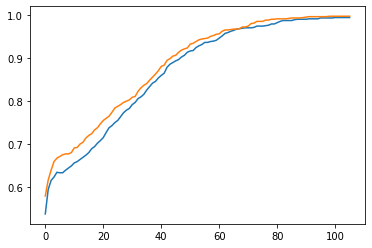

In [83]:
tf.keras.backend.clear_session()
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="accuracy",
        min_delta=1e-3,
        patience=10,
        verbose=1,
    )]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, epochs=500, verbose=1, validation_split=0.5, callbacks=callbacks)

plt.clf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

The Above Results are useful because Val_accuracy and Accuracy definitely show similar growth. There paths are close to each other and hence we can say the modle is a bit more general. Why? Because since we gave it unseen data it still continues to hold the same accuracy as it goes further a better Parameter insead of Accuracy is Loss here. Let us take a look at that first.

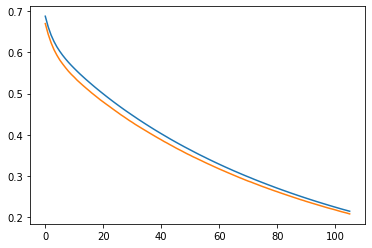

In [84]:
plt.clf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Similar Results, Val_loss matches the training Loss

Let us Further go ahead and try plotting the ROC curve for this. Area Under Curve

Area Under the Curve Train:	 0.9952015355086372
Area Under the Curve Test:	 0.9979123173277662


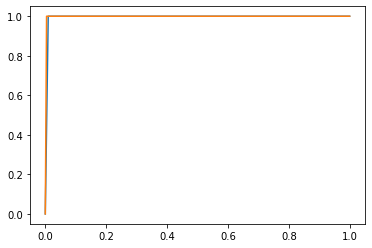

In [95]:
x_train = x[:int(0.5*y.shape[0])]
x_test = x[int(0.5*y.shape[0]):]

pred_train = [1 if i[0]>0.5 else 0 for i in model.predict(x_train)]
pred_test = [1 if i[0]>0.5 else 0 for i in model.predict(x_test)]

y_train = y[:int(0.5*y.shape[0])]
y_test = y[int(0.5*y.shape[0]):]

fpr_train, tpr_train, _ = metrics.roc_curve(y_train, pred_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, pred_test)

auc_train = metrics.auc(fpr_train, tpr_train)
auc_test = metrics.auc(fpr_test, tpr_test)

print('Area Under the Curve Train:\t', auc_train)
print('Area Under the Curve Test:\t', auc_test)

plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test)
plt.show()

However, all the above things I have said are to be implemented during training except for the ROC curve which can be implemented after training. The next section will discuss how to evaluate generalization on a already trained Model. Just like the ROC curve.

1. ROC CURVE and AUC 

(https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Comparing_Two_ROC_Curves-Independent_Groups_Design.pdf)
2. TOC CURVE

Methods I was thinking of applying:

1. Sampling and Checking Loss on Training and Validation Set by Windowing over root(n) samples. Or any other sublinear function. Scoring using Stochastic Outlier Selection
2. Accuracy check using the above.
3. Entropy of the above two lists

Finally using some ANN  or mathematical formula we can score it between 0 and 1. 0 being a highly overfitting model and 1 being a very general model.